# 고급 모델링 기법 (Functional API)

본 튜토리얼에서는 고급 텐서플로우 모델링에 대하여 배웁니다.

- Functional API

## 필요한 모듈 import 

In [1]:
import tensorflow as tf

## 실습에 필요한 Dataset 로드

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

**이미지 정규화 (Normalization)**

* 모든 이미지 픽셀(pixel)값들을 0~1 사이의 값으로 정규화 해 줍니다.
* x_train, x_valid 에 대해서만 정규화합니다.

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.min(), x_train.max()

(0.0, 1.0)

## Sequential API

`tf.keras.Sequential()`가 `tf.keras.models.Sequential()`을 레퍼런스 하고 있기 때문에 같은 객체가 생성됩니다.

In [8]:
seq_model = tf.keras.models.Sequential()
seq_model

In [9]:
seq_model = tf.keras.Sequential()
seq_model

**Sequential API를 활용하여 모델**을 구축합니다.

In [10]:
seq_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

모델의 **요약본(summary)**을 확인합니다.

In [11]:
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


## Functional API

- 이번에는 함수형 API를 활용하여 모델 구축을 진행합니다.
Functional API의 핵심은 input 인자로 이전 layer의 output을 대입하는 것입니다.
- Functional API의 첫번째 layer는 **Input layer**로 이어야 합니다.

### Input layer

- Sequential API로 모델을 구축할 때는 input_shape로 지정했지만, Functional API는 **Input layer를 선언**해야 합니다.

- layer마다 name을 지정해 줄 수 있습니다. 지정한 name은 모델의 요약(summary) 확인시 출력됩니다.

In [12]:
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

그 다음 단계 부터는 layer를 차례대로 쌓아 주면 됩니다.

이전 단계의 layer output이 다음 layer의 input 값으로 들어갈 수 있도록 **chain처럼 연결**해 줍니다.

### Chain 처럼 모델 쌓기

In [13]:
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(64, activation='relu', name='Dense3')(x3)
x5 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x4)

### 각 변수에 담은 layer 확인

위의 Functional API로 모델링을 구축했다면, 각 변수에 담은 layer를 출력해 볼 수 있습니다.

In [14]:
x1

<tf.Tensor 'Flatten/Reshape_1:0' shape=(None, 784) dtype=float32>

In [15]:
x2

<tf.Tensor 'Dense1/Relu:0' shape=(None, 256) dtype=float32>

### Model 로 빌드하기

In [16]:
func_model = tf.keras.Model(inputs=input_layer, outputs=x5, name='FunctionalModel')

model의 `summary()`로 학습해야할 parameter의 갯수가 Sequential API로 쌓은 모델과 동일한지 확인합니다.

In [17]:
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 28, 28)]          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
Dense2 (Dense)               (None, 128)               32896     
_________________________________________________________________
Dense3 (Dense)               (None, 64)                8256      
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_____________________________________________

### Plot Model로 시각화

`plot_model`은 빌드한 모델에 대한 시각화를 제공합니다.

나중에는 복잡한 모델을 코드로 구현하게 될 때, 반복문이나 조건문을 사용하기도 합니다. 그러한 경우에는 모델의 구조 파악이 매우 까다롭습니다. 하지만, `plot_model`로 **시각화를 해보면 쉽게 모델의 구조를 파악**해 볼 수 있습니다.

In [18]:
from tensorflow.keras.utils import plot_model

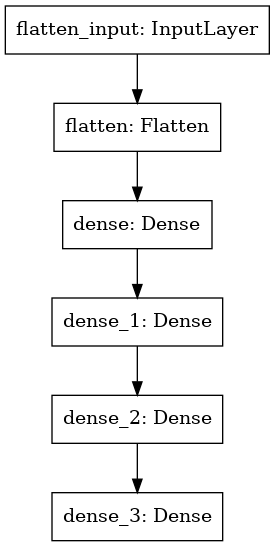

In [19]:
plot_model(seq_model)

**주요 parameter**

- show_shapes: 모델의 shape 출력
- show_layer_names: 모델의 name 출력
- to_file: 저장할 파일의 이름

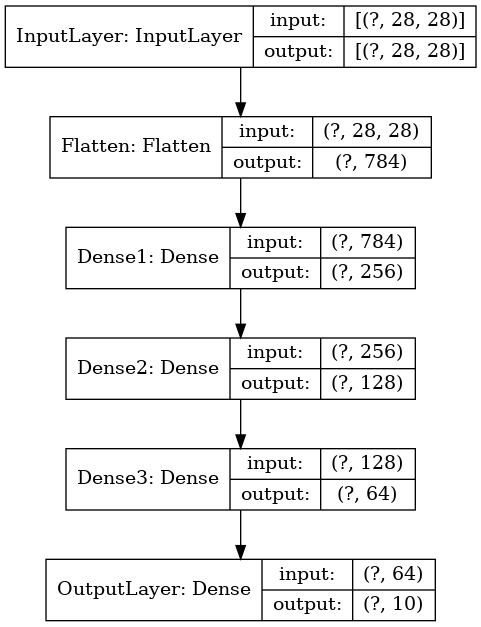

In [20]:
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

### Sequential & Functional API 모델의 학습

모델의 학습 단계는 동일합니다. 

나중에는 custom 학습 방법도 알아야 하지만, 지금은 **compile(), fit() 으로 학습하고, evaluate()로 모델을 평가**하도록 하겠습니다.

#### Sequential API 모델의 학습

In [21]:
seq_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
seq_model.fit(x_train, y_train, epochs=3)
seq_model.evaluate(x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2124 - accuracy: 0.9361
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0892 - accuracy: 0.9729
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9758


[0.08002541959285736, 0.9757999777793884]

#### Functional API 모델의 학습

In [22]:
func_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
func_model.fit(x_train, y_train, epochs=3)
func_model.evaluate(x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2135 - accuracy: 0.9359
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9722
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9751


[0.08081302791833878, 0.9750999808311462]